# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from agent_class import Agent
from collections import deque
import torch

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
[brain_name] 

['BananaBrain']

In [6]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    #print(action)
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    #print(reward)
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 1.0


When finished, you can close the environment.

In [8]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
import torch

In [6]:
agent = Agent(state_size=37, action_size=4, seed=0)

In [7]:
score_list = []
scores_window = deque(maxlen = 100)
eps = 1
eps_end=0.01
eps_decay=0.995
previous_best = 0.0
for i_episode in range(1,1500):
    env_info = env.reset(train_mode = True)[brain_name]
    state = env_info.vector_observations[0]
    score = 0
    while True:
        action = agent.act(state, eps)
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        #print(reward)
        done = env_info.local_done[0]                  # see if episode has finished
        agent.step(state, action, reward, next_state, done)
        score += reward                                # update the score        
        state = next_state  
        if done:
                break 
    scores_window.append(score)       # save most recent score
    score_list.append(score)              # save most recent score
    eps = max(eps_end, eps_decay*eps) # decrease epsilon
    print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
    if i_episode % 100 == 0:
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
    if np.mean(scores_window)>=13.0:
        print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
        if(previous_best < np.mean(scores_window)):
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            previous_best = np.mean(scores_window)
        #break



Episode 100	Average Score: 1.31
Episode 200	Average Score: 5.56
Episode 300	Average Score: 8.77
Episode 400	Average Score: 10.42
Episode 499	Average Score: 13.00
Environment solved in 399 episodes!	Average Score: 13.00
Episode 500	Average Score: 13.01

Environment solved in 400 episodes!	Average Score: 13.01
Episode 507	Average Score: 13.01
Environment solved in 407 episodes!	Average Score: 13.01
Episode 511	Average Score: 13.00
Environment solved in 411 episodes!	Average Score: 13.00
Episode 513	Average Score: 13.08
Environment solved in 413 episodes!	Average Score: 13.08
Episode 514	Average Score: 13.10
Environment solved in 414 episodes!	Average Score: 13.10
Episode 515	Average Score: 13.10
Environment solved in 415 episodes!	Average Score: 13.10
Episode 516	Average Score: 13.11
Environment solved in 416 episodes!	Average Score: 13.11
Episode 517	Average Score: 13.20
Environment solved in 417 episodes!	Average Score: 13.20
Episode 518	Average Score: 13.21
Environment solved in 418 e

Episode 599	Average Score: 13.70
Environment solved in 499 episodes!	Average Score: 13.70
Episode 600	Average Score: 13.73

Environment solved in 500 episodes!	Average Score: 13.73
Episode 601	Average Score: 13.87
Environment solved in 501 episodes!	Average Score: 13.87
Episode 602	Average Score: 13.90
Environment solved in 502 episodes!	Average Score: 13.90
Episode 603	Average Score: 13.94
Environment solved in 503 episodes!	Average Score: 13.94
Episode 604	Average Score: 13.85
Environment solved in 504 episodes!	Average Score: 13.85
Episode 605	Average Score: 13.84
Environment solved in 505 episodes!	Average Score: 13.84
Episode 606	Average Score: 13.86
Environment solved in 506 episodes!	Average Score: 13.86
Episode 607	Average Score: 13.87
Environment solved in 507 episodes!	Average Score: 13.87
Episode 608	Average Score: 13.90
Environment solved in 508 episodes!	Average Score: 13.90
Episode 609	Average Score: 13.95
Environment solved in 509 episodes!	Average Score: 13.95
Episode 6

Episode 691	Average Score: 14.42
Environment solved in 591 episodes!	Average Score: 14.42
Episode 692	Average Score: 14.41
Environment solved in 592 episodes!	Average Score: 14.41
Episode 693	Average Score: 14.50
Environment solved in 593 episodes!	Average Score: 14.50
Episode 694	Average Score: 14.51
Environment solved in 594 episodes!	Average Score: 14.51
Episode 695	Average Score: 14.50
Environment solved in 595 episodes!	Average Score: 14.50
Episode 696	Average Score: 14.45
Environment solved in 596 episodes!	Average Score: 14.45
Episode 697	Average Score: 14.47
Environment solved in 597 episodes!	Average Score: 14.47
Episode 698	Average Score: 14.42
Environment solved in 598 episodes!	Average Score: 14.42
Episode 699	Average Score: 14.45
Environment solved in 599 episodes!	Average Score: 14.45
Episode 700	Average Score: 14.52

Environment solved in 600 episodes!	Average Score: 14.52
Episode 701	Average Score: 14.49
Environment solved in 601 episodes!	Average Score: 14.49
Episode 7

Episode 783	Average Score: 15.65
Environment solved in 683 episodes!	Average Score: 15.65
Episode 784	Average Score: 15.70
Environment solved in 684 episodes!	Average Score: 15.70
Episode 785	Average Score: 15.60
Environment solved in 685 episodes!	Average Score: 15.60
Episode 786	Average Score: 15.58
Environment solved in 686 episodes!	Average Score: 15.58
Episode 787	Average Score: 15.59
Environment solved in 687 episodes!	Average Score: 15.59
Episode 788	Average Score: 15.72
Environment solved in 688 episodes!	Average Score: 15.72
Episode 789	Average Score: 15.72
Environment solved in 689 episodes!	Average Score: 15.72
Episode 790	Average Score: 15.78
Environment solved in 690 episodes!	Average Score: 15.78
Episode 791	Average Score: 15.84
Environment solved in 691 episodes!	Average Score: 15.84
Episode 792	Average Score: 15.87
Environment solved in 692 episodes!	Average Score: 15.87
Episode 793	Average Score: 15.90
Environment solved in 693 episodes!	Average Score: 15.90
Episode 79

Episode 875	Average Score: 16.40
Environment solved in 775 episodes!	Average Score: 16.40
Episode 876	Average Score: 16.36
Environment solved in 776 episodes!	Average Score: 16.36
Episode 877	Average Score: 16.39
Environment solved in 777 episodes!	Average Score: 16.39
Episode 878	Average Score: 16.33
Environment solved in 778 episodes!	Average Score: 16.33
Episode 879	Average Score: 16.29
Environment solved in 779 episodes!	Average Score: 16.29
Episode 880	Average Score: 16.25
Environment solved in 780 episodes!	Average Score: 16.25
Episode 881	Average Score: 16.20
Environment solved in 781 episodes!	Average Score: 16.20
Episode 882	Average Score: 16.20
Environment solved in 782 episodes!	Average Score: 16.20
Episode 883	Average Score: 16.16
Environment solved in 783 episodes!	Average Score: 16.16
Episode 884	Average Score: 16.04
Environment solved in 784 episodes!	Average Score: 16.04
Episode 885	Average Score: 16.16
Environment solved in 785 episodes!	Average Score: 16.16
Episode 88

Episode 967	Average Score: 15.33
Environment solved in 867 episodes!	Average Score: 15.33
Episode 968	Average Score: 15.30
Environment solved in 868 episodes!	Average Score: 15.30
Episode 969	Average Score: 15.36
Environment solved in 869 episodes!	Average Score: 15.36
Episode 970	Average Score: 15.35
Environment solved in 870 episodes!	Average Score: 15.35
Episode 971	Average Score: 15.45
Environment solved in 871 episodes!	Average Score: 15.45
Episode 972	Average Score: 15.38
Environment solved in 872 episodes!	Average Score: 15.38
Episode 973	Average Score: 15.44
Environment solved in 873 episodes!	Average Score: 15.44
Episode 974	Average Score: 15.42
Environment solved in 874 episodes!	Average Score: 15.42
Episode 975	Average Score: 15.44
Environment solved in 875 episodes!	Average Score: 15.44
Episode 976	Average Score: 15.49
Environment solved in 876 episodes!	Average Score: 15.49
Episode 977	Average Score: 15.48
Environment solved in 877 episodes!	Average Score: 15.48
Episode 97

Episode 1058	Average Score: 16.09
Environment solved in 958 episodes!	Average Score: 16.09
Episode 1059	Average Score: 16.10
Environment solved in 959 episodes!	Average Score: 16.10
Episode 1060	Average Score: 16.15
Environment solved in 960 episodes!	Average Score: 16.15
Episode 1061	Average Score: 16.14
Environment solved in 961 episodes!	Average Score: 16.14
Episode 1062	Average Score: 16.17
Environment solved in 962 episodes!	Average Score: 16.17
Episode 1063	Average Score: 16.14
Environment solved in 963 episodes!	Average Score: 16.14
Episode 1064	Average Score: 16.14
Environment solved in 964 episodes!	Average Score: 16.14
Episode 1065	Average Score: 16.17
Environment solved in 965 episodes!	Average Score: 16.17
Episode 1066	Average Score: 16.16
Environment solved in 966 episodes!	Average Score: 16.16
Episode 1067	Average Score: 16.22
Environment solved in 967 episodes!	Average Score: 16.22
Episode 1068	Average Score: 16.22
Environment solved in 968 episodes!	Average Score: 16.22

Episode 1148	Average Score: 16.30
Environment solved in 1048 episodes!	Average Score: 16.30
Episode 1149	Average Score: 16.32
Environment solved in 1049 episodes!	Average Score: 16.32
Episode 1150	Average Score: 16.37
Environment solved in 1050 episodes!	Average Score: 16.37
Episode 1151	Average Score: 16.33
Environment solved in 1051 episodes!	Average Score: 16.33
Episode 1152	Average Score: 16.38
Environment solved in 1052 episodes!	Average Score: 16.38
Episode 1153	Average Score: 16.33
Environment solved in 1053 episodes!	Average Score: 16.33
Episode 1154	Average Score: 16.35
Environment solved in 1054 episodes!	Average Score: 16.35
Episode 1155	Average Score: 16.37
Environment solved in 1055 episodes!	Average Score: 16.37
Episode 1156	Average Score: 16.38
Environment solved in 1056 episodes!	Average Score: 16.38
Episode 1157	Average Score: 16.40
Environment solved in 1057 episodes!	Average Score: 16.40
Episode 1158	Average Score: 16.37
Environment solved in 1058 episodes!	Average S

Episode 1238	Average Score: 15.34
Environment solved in 1138 episodes!	Average Score: 15.34
Episode 1239	Average Score: 15.36
Environment solved in 1139 episodes!	Average Score: 15.36
Episode 1240	Average Score: 15.32
Environment solved in 1140 episodes!	Average Score: 15.32
Episode 1241	Average Score: 15.34
Environment solved in 1141 episodes!	Average Score: 15.34
Episode 1242	Average Score: 15.22
Environment solved in 1142 episodes!	Average Score: 15.22
Episode 1243	Average Score: 15.22
Environment solved in 1143 episodes!	Average Score: 15.22
Episode 1244	Average Score: 15.19
Environment solved in 1144 episodes!	Average Score: 15.19
Episode 1245	Average Score: 15.19
Environment solved in 1145 episodes!	Average Score: 15.19
Episode 1246	Average Score: 15.20
Environment solved in 1146 episodes!	Average Score: 15.20
Episode 1247	Average Score: 15.18
Environment solved in 1147 episodes!	Average Score: 15.18
Episode 1248	Average Score: 15.20
Environment solved in 1148 episodes!	Average S

Episode 1328	Average Score: 15.90
Environment solved in 1228 episodes!	Average Score: 15.90
Episode 1329	Average Score: 15.83
Environment solved in 1229 episodes!	Average Score: 15.83
Episode 1330	Average Score: 15.85
Environment solved in 1230 episodes!	Average Score: 15.85
Episode 1331	Average Score: 15.97
Environment solved in 1231 episodes!	Average Score: 15.97
Episode 1332	Average Score: 16.02
Environment solved in 1232 episodes!	Average Score: 16.02
Episode 1333	Average Score: 16.02
Environment solved in 1233 episodes!	Average Score: 16.02
Episode 1334	Average Score: 16.00
Environment solved in 1234 episodes!	Average Score: 16.00
Episode 1335	Average Score: 16.02
Environment solved in 1235 episodes!	Average Score: 16.02
Episode 1336	Average Score: 16.01
Environment solved in 1236 episodes!	Average Score: 16.01
Episode 1337	Average Score: 16.14
Environment solved in 1237 episodes!	Average Score: 16.14
Episode 1338	Average Score: 16.09
Environment solved in 1238 episodes!	Average S

Episode 1418	Average Score: 16.46
Environment solved in 1318 episodes!	Average Score: 16.46
Episode 1419	Average Score: 16.52
Environment solved in 1319 episodes!	Average Score: 16.52
Episode 1420	Average Score: 16.49
Environment solved in 1320 episodes!	Average Score: 16.49
Episode 1421	Average Score: 16.48
Environment solved in 1321 episodes!	Average Score: 16.48
Episode 1422	Average Score: 16.43
Environment solved in 1322 episodes!	Average Score: 16.43
Episode 1423	Average Score: 16.43
Environment solved in 1323 episodes!	Average Score: 16.43
Episode 1424	Average Score: 16.40
Environment solved in 1324 episodes!	Average Score: 16.40
Episode 1425	Average Score: 16.32
Environment solved in 1325 episodes!	Average Score: 16.32
Episode 1426	Average Score: 16.35
Environment solved in 1326 episodes!	Average Score: 16.35
Episode 1427	Average Score: 16.51
Environment solved in 1327 episodes!	Average Score: 16.51
Episode 1428	Average Score: 16.54
Environment solved in 1328 episodes!	Average S

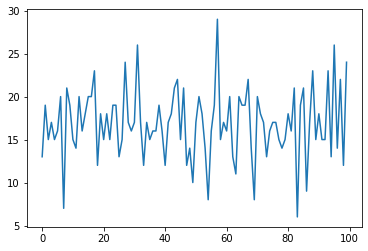

In [8]:
import matplotlib.pyplot as plt
plt.plot(scores_window)

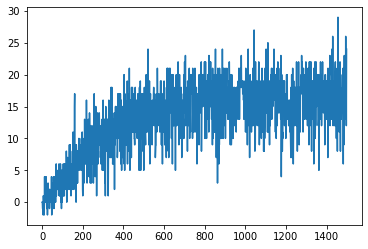

In [9]:
plt.plot(score_list)

## View trained agent in action

In [10]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = agent.act(state, eps)        # select an action
    #print(action)
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    #print(reward)
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0


In [ ]:
env.close()